In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime

from datetime import timedelta, datetime, date
import calendar

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
import glob

In [2]:
ds_allpr = xr.open_dataset('ds_pr_t_td_cape_EMCB.nc')

In [5]:
ds_allpr

<xarray.Dataset>
Dimensions:             (L: 35, M: 11, S: 131, lat: 11, lon: 14)
Coordinates:
  * M                   (M) int64 0 1 2 3 4 5 6 7 8 9 10
  * lat                 (lat) float32 42.0 41.0 40.0 39.0 ... 34.0 33.0 32.0
  * lon                 (lon) float32 257.0 258.0 259.0 ... 268.0 269.0 270.0
  * L                   (L) float64 0.5 1.5 2.5 3.5 4.5 ... 31.5 32.5 33.5 34.5
  * S                   (S) datetime64[ns] 1999-06-02 1999-06-09 ... 2008-08-27
Data variables:
    APCP_P1_L1_GLL0     (M, S, L, lat, lon) float32 ...
    TMP_P1_L103_GLL0    (M, S, L, lat, lon) float32 ...
    DPT_P1_L103_GLL0    (M, S, L, lat, lon) float32 ...
    CAPE_P1_2L108_GLL0  (M, S, L, lat, lon) float32 0.0 2.0 0.0 ... 784.0 832.0

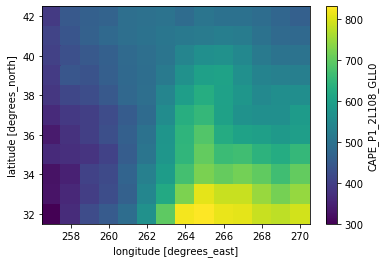

In [6]:
ds_allpr.CAPE_P1_2L108_GLL0.sel(L=slice(0.5, 29.5)).mean(dim=['M','S','L']).plot()

# SELECT LEAD TIMES

Looking at week 1

In [7]:
week1 = ds_allpr.sel(L=slice(1.5,7.5))
week1M = ds_allpr.sel(L=slice(1.5,7.5))

In [8]:
# here i do a trick, I stack the dimensions all together
week1 = week1.stack(MSll=('M','S','lat','lon','L')).compute()
week1

<xarray.Dataset>
Dimensions:             (MSll: 1553398)
Coordinates:
  * MSll                (MSll) MultiIndex
  - M                   (MSll) int64 0 0 0 0 0 0 0 0 ... 10 10 10 10 10 10 10 10
  - S                   (MSll) datetime64[ns] 1999-06-02 ... 2008-08-27
  - lat                 (MSll) float64 42.0 42.0 42.0 42.0 ... 32.0 32.0 32.0
  - lon                 (MSll) float64 257.0 257.0 257.0 ... 270.0 270.0 270.0
  - L                   (MSll) float64 1.5 2.5 3.5 4.5 5.5 ... 4.5 5.5 6.5 7.5
Data variables:
    APCP_P1_L1_GLL0     (MSll) float32 0.0 0.0 0.0 ... 1.4 6.7000003 2.1000001
    TMP_P1_L103_GLL0    (MSll) float32 295.7 295.80002 296.7 ... 297.30002 297.6
    DPT_P1_L103_GLL0    (MSll) float32 278.1 272.5 271.5 ... 295.2 295.2
    CAPE_P1_2L108_GLL0  (MSll) float32 76.0 0.0 30.0 15.0 ... 101.0 108.0 236.0

In [9]:
# here i calculate the mean along ensemble member M and then stack
# for simplicity I call the stacked dimension MSll like before, so I can switch among the two datasets easily
# but this dataset does not have M as a dimension anymore
week1M = week1M.stack(MSll=('S','lat','lon','L')).mean('M').compute()
week1M

<xarray.Dataset>
Dimensions:             (MSll: 141218)
Coordinates:
  * MSll                (MSll) MultiIndex
  - S                   (MSll) datetime64[ns] 1999-06-02 ... 2008-08-27
  - lat                 (MSll) float64 42.0 42.0 42.0 42.0 ... 32.0 32.0 32.0
  - lon                 (MSll) float64 257.0 257.0 257.0 ... 270.0 270.0 270.0
  - L                   (MSll) float64 1.5 2.5 3.5 4.5 5.5 ... 4.5 5.5 6.5 7.5
Data variables:
    APCP_P1_L1_GLL0     (MSll) float32 1.7909092 0.06363636 ... 4.672727
    TMP_P1_L103_GLL0    (MSll) float32 295.18637 295.24548 ... 298.91 298.41
    DPT_P1_L103_GLL0    (MSll) float32 279.45456 275.52728 ... 293.31818
    CAPE_P1_2L108_GLL0  (MSll) float32 359.81818 164.18182 ... 328.45456

In [10]:
# I give a numeric value for MSll that is the size of MSll, 
# the number will change once you load all years
week1.coords['MSll'] = np.arange(0,1553398) 
week1M.coords['MSll'] = np.arange(0,141218) 

#rename variables
week1M = week1M.rename({'APCP_P1_L1_GLL0':'pr','TMP_P1_L103_GLL0':'tas', 
                        'DPT_P1_L103_GLL0':'tdps', 'CAPE_P1_2L108_GLL0':'cape'})
week1 = week1.rename({'APCP_P1_L1_GLL0':'pr','TMP_P1_L103_GLL0':'tas', 
                      'DPT_P1_L103_GLL0':'tdps', 'CAPE_P1_2L108_GLL0':'cape'})

# Week 2

In [11]:
week2 = ds_allpr.sel(L=slice(8.5,14.5))
week2 = week2.stack(MSll=('M','S','lat','lon','L')).compute()


week2M = ds_allpr.sel(L=slice(8.5,14.5))
week2M = week2M.stack(MSll=('S','lat','lon','L')).mean('M').compute()


In [12]:
week2 = week2.rename({'APCP_P1_L1_GLL0':'pr','TMP_P1_L103_GLL0':'tas', 
                      'DPT_P1_L103_GLL0':'tdps', 'CAPE_P1_2L108_GLL0':'cape'})
week2M = week2M.rename({'APCP_P1_L1_GLL0':'pr','TMP_P1_L103_GLL0':'tas', 
                        'DPT_P1_L103_GLL0':'tdps', 'CAPE_P1_2L108_GLL0':'cape'})
week2.coords['MSll'] = np.arange(0,1553398) 
week2M.coords['MSll'] = np.arange(0,141218) 


/local/ERAin/lib/python3.6/site-packages/xarray/core/dataset.py:2648: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  v.labels,


# Quantile extraction

this now can be achieved with xhistogram, I think, but I will leave it to this trick for now
It works fine.



In [13]:
# I round the values of temperature to be on each 2 degree bins.
# this can be extended to whatever variable we want to condition precip on

step = 2.
to_bin = lambda x: np.round(x / step) * step
week1["tasb"] = to_bin(week1.tas)
week1M["tasb"] = to_bin(week1M.tas)



In [14]:
# here I run the analysis on the ensemble average

#group pr and tas by tas
grouped1M = week1M[['pr','tasb']].groupby('tasb')
# this extract the max of each group, I really just use it to initialize a 
# dataset with a variable...
ds_groupM = grouped1M.max()
# to then add the coordinates quantiles
q=[75,85,95,99,99.1,99.5,99.9,99.95,99.99]
ds_groupM.coords['quantiles'] = np.array(q)
# I can drop now that bogus variable with the max
ds_groupM = ds_groupM.drop('pr')

In [15]:
#range of quantiles

# list of P(q) for each temperature bin
arr = [np.nanpercentile(gp.pr.values, q) 
       if gp.pr.shape[0]>100 else np.zeros_like(q) for iim, (k, gp) in enumerate(grouped1M) ]
       # this if above is to avoid small samples
#add to dataset
ds_groupM['pr_q_tas'] = (('tasb','quantiles'), np.array(arr) )


In [16]:
# repeat same thing with all ensemble members
grouped1 = week1[['pr','tasb']].groupby('tasb')
ds_group = grouped1.max()
ds_group.coords['quantiles'] = np.array(q)
ds_group = ds_group.drop('pr')
arr = [np.nanpercentile(gp.pr.values, q) 
       if gp.pr.shape[0]>100 else np.zeros_like(q) for iim, (k, gp) in enumerate(grouped1) ]

ds_group['pr_q_tas'] = (('tasb','quantiles'), np.array(arr) )




/local/ERAin/lib/python3.6/site-packages/xarray/core/computation.py:603: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


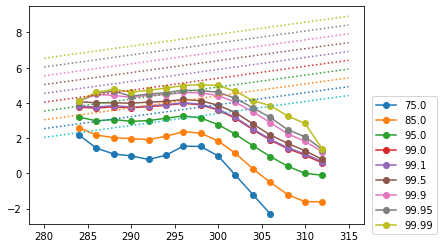

In [17]:
#not pretty quick plot, with CC slope (0.068)
plt.plot(ds_group.tasb,np.log(ds_group.pr_q_tas),'o-')
plt.legend(ds_group.quantiles.values, bbox_to_anchor=(1.01,0.61))
for iim in np.arange(-17,-12,0.5):
    plt.plot(np.array([280,315]),iim+0.068*np.array([280,315]),':')


# Repeat everything for week2 lead times

In [18]:
# bin temperatures
step = 2.
to_bin = lambda x: np.round(x / step) * step
week2["tasb"] = to_bin(week2.tas)
week2M["tasb"] = to_bin(week2M.tas)
# 

# plt.hist(week2.tasb.values.ravel(),bins=20)

In [19]:
# ensemble average
grouped2M = week2M[['pr','tasb']].groupby('tasb')
ds_group2M = grouped2M.max()
ds_group2M.coords['quantiles'] = np.array(q)
ds_group2M = ds_group2M.drop('pr')
arr = [np.nanpercentile(gp.pr.values, q) 
       if gp.pr.shape[0]>100 else np.zeros_like(q) for iim, (k, gp) in enumerate(grouped2M) ]
#add to dataset
ds_group2M['pr_q_tas'] = (('tasb','quantiles'), np.array(arr) )

#ensemble members
grouped2 = week2[['pr','tasb']].groupby('tasb')
ds_group2 = grouped2.max()
ds_group2.coords['quantiles'] = np.array(q)
ds_group2 = ds_group2.drop('pr')
arr = [np.nanpercentile(gp.pr.values, q) 
       if gp.pr.shape[0]>100 else np.zeros_like(q) for iim, (k, gp) in enumerate(grouped2) ]

ds_group2['pr_q_tas'] = (('tasb','quantiles'), np.array(arr) )


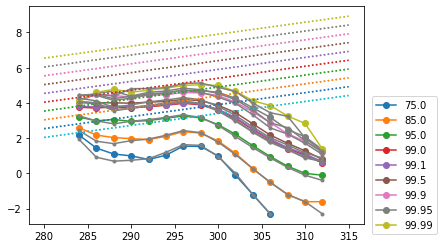

In [20]:
plt.plot(ds_group.tasb,np.log(ds_group.pr_q_tas),'o-')
plt.legend(ds_group.quantiles.values, bbox_to_anchor=(1.01,0.61))
# plt.xlim((287,315))
for iim in np.arange(-17,-12,0.5):
    plt.plot(np.array([280,315]),iim+0.068*np.array([280,315]),':')
    
plt.plot(ds_group2.tasb,np.log(ds_group2.pr_q_tas),'.-', color='grey')
plt.legend(ds_group2.quantiles.values, bbox_to_anchor=(1.01,0.61))
# plt.xlim((287,315))
for iim in np.arange(-17,-12,0.5):
    plt.plot(np.array([280,315]),iim+0.068*np.array([280,315]),':')


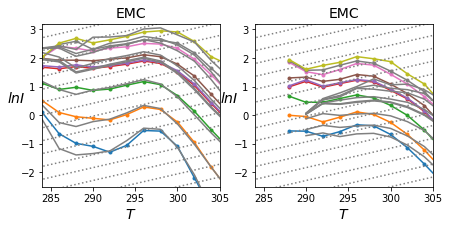

In [21]:
# PLOT USED in proposal

plt.figure(figsize=(7,3))
ax1 = plt.subplot(121)
plt.plot(ds_group.tasb,np.log(ds_group.pr_q_tas/8),'.-')
plt.plot(ds_group2.tasb,np.log(ds_group2.pr_q_tas/8),'-', color='grey')

ax2 = plt.subplot(122)
plt.plot(ds_groupM.tasb,np.log(ds_groupM.pr_q_tas/8),'.-')
plt.plot(ds_group2M.tasb,np.log(ds_group2M.pr_q_tas/8),'-', color='grey')
for ax in [ax1, ax2]:
    for iim in np.arange(-31,-13,0.45):
        ax.plot(np.array([280,315]),iim+0.068*np.array([280,315]),':', color='grey')
    ax.set_title('EMC', fontsize=14)
    ax.set_ylim((-2.5,3.2))
    ax.set_xlim((284,305))
    # plt.legend(ds_group.quantiles.values, loc=3,bbox_to_anchor=(1.01,0),fontsize=11)
    ax.set_xlabel(r'$T$', fontsize=14)
    ax.set_ylabel(r'$lnI$', rotation=0, fontsize=14)

# I can make the previous step into a code

In [22]:
def calculate_p_x_plot(ds_week, var1, var2, binsize=2.):
    '''
    var1 will be the precip
    var2 will be x'''
    q=[75,85,95,99,99.1,99.5,99.9,99.95,99.99]
    
    step = binsize
    to_bin = lambda x: np.round(x / step) * step
    ds_week["binvar"] = to_bin(ds_week[var2])
    
    grouped = ds_week[[var1, 'binvar']].groupby('binvar')
    ds_out = grouped.max()
    ds_out.coords['quantiles'] = np.array(q)
    ds_out = ds_out.drop(var1)
    arr = [np.nanpercentile(gp.pr.values, q) 
           if gp.pr.shape[0]>100 else np.zeros_like(q) for iim, (k, gp) in enumerate(grouped) ]

    ds_out['pr_q_'+var2] = (('binvar','quantiles'), np.array(arr) )
    ds_out = ds_out.rename({'binvar':var2+'b'})
    return ds_out
    

# ALL VARIABLES for week1

In [23]:
week1M['logcape'] = np.log(week1M.cape)
week1['logcape'] = np.log(week1.cape)
week2M['logcape'] = np.log(week2M.cape)
week2['logcape'] = np.log(week2.cape)

In [24]:
ds_temp = calculate_p_x_plot(week1, 'pr', 'tdps')
ds_group = xr.merge([ds_group, ds_temp] )
ds_temp = calculate_p_x_plot(week1, 'pr', 'logcape', binsize=0.5)
ds_group = xr.merge([ds_group, ds_temp] )


In [25]:
ds_temp = calculate_p_x_plot(week1M, 'pr', 'tdps')
ds_groupM = xr.merge([ds_groupM, ds_temp] )
ds_temp = calculate_p_x_plot(week1M, 'pr', 'logcape', binsize=0.5)
ds_groupM = xr.merge([ds_groupM, ds_temp] )


In [26]:
ds_temp = calculate_p_x_plot(week2, 'pr', 'tdps')
ds_group2 = xr.merge([ds_group2, ds_temp] )
ds_temp = calculate_p_x_plot(week2, 'pr', 'logcape', binsize=0.5)
ds_group2 = xr.merge([ds_group2, ds_temp] )


In [27]:
ds_temp = calculate_p_x_plot(week2M, 'pr', 'tdps')
ds_group2M = xr.merge([ds_group2M, ds_temp] )
ds_temp = calculate_p_x_plot(week2M, 'pr', 'logcape', binsize=0.5)
ds_group2M = xr.merge([ds_group2M, ds_temp] )


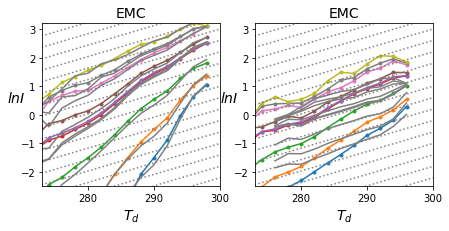

In [28]:
# PLOT USED in proposal

plt.figure(figsize=(7,3))
ax1 = plt.subplot(121)
plt.plot(ds_group.tdpsb,np.log(ds_group.pr_q_tdps/8),'.-')
plt.plot(ds_group2.tdpsb,np.log(ds_group2.pr_q_tdps/8),'-', color='grey')

ax2 = plt.subplot(122)
plt.plot(ds_groupM.tdpsb,np.log(ds_groupM.pr_q_tdps/8),'.-')
plt.plot(ds_group2M.tdpsb,np.log(ds_group2M.pr_q_tdps/8),'-', color='grey')
for ax in [ax1, ax2]:    
    for iim in np.arange(-31,-13,0.4):
        ax.plot(np.array([270,315]),iim+0.068*np.array([270,315]),':', color='grey')
    ax.set_title('EMC', fontsize=14)
    ax.set_ylim((-2.5,3.2))
    ax.set_xlim((273,300))
    # plt.legend(ds_group.quantiles.values, loc=3,bbox_to_anchor=(1.01,0),fontsize=11)
    ax.set_xlabel(r'$T_d$', fontsize=14)
    ax.set_ylabel(r'$lnI$', rotation=0, fontsize=14)


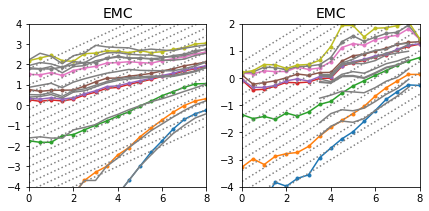

In [29]:
# PLOT USED in proposal

plt.figure(figsize=(7,3))
ax1 = plt.subplot(121)
plt.plot(ds_group.logcapeb,np.log(ds_group.pr_q_logcape/8),'.-')
plt.plot(ds_group2.logcapeb,np.log(ds_group2.pr_q_logcape/8),'-', color='grey')

ax2 = plt.subplot(122)
plt.plot(ds_groupM.logcapeb,np.log(ds_groupM.pr_q_logcape/8),'.-')
plt.plot(ds_group2M.logcapeb,np.log(ds_group2M.pr_q_logcape/8),'-', color='grey')
for iax,ax in enumerate([ax1, ax2]):    
    for iim in np.arange(-5,2/(iax+1),0.4):
        ax.plot(np.array([0,8]),iim+0.5*np.array([0,8]),':', color='grey')
    ax.set_title('EMC', fontsize=14)
    ax.set_xlim((0,8))
    ax.set_ylim((-4,4/(iax+1)))
#     # plt.legend(ds_group.quantiles.values, loc=3,bbox_to_anchor=(1.01,0),fontsize=11)
#     ax.set_xlabel(r'$T_d$', fontsize=14)
#     ax.set_ylabel(r'$lnI$', rotation=0, fontsize=14)
